In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
tokenized_df = pd.read_csv('csv/tokenized_access_logs.csv', encoding='ISO-8859-1')
supply_df = pd.read_csv('csv/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
desc_df = pd.read_csv('csv/DescriptionDataCoSupplyChain.csv', encoding='ISO-8859-1')

In [4]:
tokenized_df.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [5]:
supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
desc_df.head()

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


In [7]:
tokenized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [8]:
tokenized_df.describe()

,Hour
count,469977.000000
mean,14.591827
std,5.574014
min,0.000000
25%,10.000000
50%,15.000000
75%,20.000000
max,23.000000


In [9]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [10]:
supply_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [11]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIELDS       52 non-null     object
 1   DESCRIPTION  52 non-null     object
dtypes: object(2)
memory usage: 964.0+ bytes


In [12]:
desc_df.describe()

,FIELDS,DESCRIPTION
count,52,52
unique,52,51
top,Type,: Product category code
freq,1,2


# Data Cleaning and Preprocessing

In [13]:
supply_df.isna().sum().to_frame().sort_values(by = [0], ascending = False).T

,Product Description,Order Zipcode,Customer Lname,Customer Zipcode,Type,Order Profit Per Order,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,order date (DateOrders),Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Order Id,Order Country,Order Customer Id,Customer Fname,Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Id,Days for shipping (real),Customer Password,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Shipping Mode
0,180519,155679,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
supply_df.drop(columns = ['Product Description', 'Order Zipcode', 'Customer Lname', 'Customer Fname', 'Product Image', 'Customer Email', 'Customer Password', 'Customer Street'], inplace = True)

In [15]:
supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [16]:
supply_df.dropna(inplace = True)

In [17]:
supply_df['order date (DateOrders)'] = pd.to_datetime(supply_df['order date (DateOrders)'])
supply_df['shipping date (DateOrders)'] = pd.to_datetime(supply_df['shipping date (DateOrders)'])
supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class


In [18]:
def cross_tab(dataframe, col, columns_list):
    new = []
    for c in columns_list:
        new.append(pd.crosstab(dataframe[col], dataframe[c], margins = True, margins_name = 'Total'))
    new_df = pd.concat(new, axis = 1, keys = columns_list)
    return new_df

In [19]:
cross_tab(supply_df, 'Category Name', ['Late_delivery_risk', 'Delivery Status', 'Customer Segment', 'Shipping Mode', 'Department Name'])

Late_delivery_risk                 Delivery Status  \
                                      0      1   Total Advance shipping   
Category Name                                                             
Accessories                         766   1014    1780              406   
As Seen on  TV!                      29     39      68               15   
Baby                                 98    109     207               49   
Baseball & Softball                 283    349     632              141   
Basketball                           30     37      67               22   
Books                               176    229     405               87   
Boxing & MMA                        185    238     423               84   
CDs                                 130    141     271               67   
Cameras                             248    344     592              126   
Camping & Hiking                   6242   7487   13729             3147   
Cardio Equipment                   5682   6805   12487             2921   
Children's Clothing                 303    348     651              157   
Cleats                            11055  13496   24551             5570   
Computers                           218    224     442              117   
Consumer Electronics                193    237     430              101   
Crafts                              213    271     484              104   
DVDs                                224    259     483              115   
Electronics                        1386   1770    3156              733   
Fishing                            7809   9516   17325             4034   
Fitness Accessories                 133    176     309               69   
Garden                              214    270     484              116   
Girls' Apparel                      537    664    1201              284   
Golf Apparel                        212    229     441              116   
Golf Bags & Carts                    19     42      61               12   
Golf Balls                          670    805    1475              357   
Golf Gloves                         468    602    1070              240   
Golf Shoes                          233    291     524              120   
Health and Beauty                   160    202     362               83   
Hockey                              285    329     614              158   
Hunting & Shooting                  193    247     440              101   
Indoor/Outdoor Games               8733  10565   19298             4451   
Kids' Golf Clubs                    179    205     384               84   
Lacrosse                            137    206     343               75   
Men's Clothing                       95    113     208               51   
Men's Footwear                    10125  12121   22246             5104   
Men's Golf Clubs                    148    135     283               83   
Music                               186    248     434               97   
Pet Supplies                        202    290     492               91   
Shop By Sport                      4926   6058   10984             2536   
Soccer                               63     75     138               28   
Sporting Goods                      159    198     357               83   
Strength Training                    47     64     111               22   
Tennis & Racquet                    145    183     328               65   
Toys                                238    291     529              123   
Trade-In                            432    542     974              232   
Video Games                         382    455     837              190   
Water Sports                       7023   8517   15540             3547   
Women's Apparel                    9559  11476   21035             4886   
Women's Clothing                    283    367     650              145   
Women's Golf Clubs                   84     97     181               47   
Total                             81540  98976

In [20]:
pd.crosstab(supply_df['Category Name'], supply_df['Order Country'])

Order Country,Afganistán,Albania,Alemania,Angola,Arabia Saudí,Argelia,Argentina,Armenia,Australia,Austria,Azerbaiyán,Bangladés,Barbados,Baréin,Belice,Benín,Bielorrusia,Bolivia,Bosnia y Herzegovina,Botsuana,Brasil,Bulgaria,Burkina Faso,Burundi,Bután,Bélgica,Camboya,Camerún,Canada,Chad,Chile,China,Chipre,Colombia,Corea del Sur,Costa Rica,Costa de Marfil,Croacia,Cuba,Dinamarca,Ecuador,Egipto,El Salvador,Emiratos Árabes Unidos,Eritrea,Eslovaquia,Eslovenia,España,Estados Unidos,Estonia,Etiopía,Filipinas,Finlandia,Francia,Gabón,Georgia,Ghana,Grecia,Guadalupe,Guatemala,Guayana Francesa,Guinea,Guinea Ecuatorial,Guinea-Bissau,Guyana,Haití,Honduras,Hong Kong,Hungría,India,Indonesia,Irak,Irlanda,Irán,Israel,Italia,Jamaica,Japón,Jordania,Kazajistán,Kenia,Kirguistán,Kuwait,Laos,Lesoto,Liberia,Libia,Lituania,Luxemburgo,Líbano,Macedonia,Madagascar,Malasia,Mali,Marruecos,Martinica,Mauritania,Moldavia,Mongolia,Montenegro,Mozambique,Myanmar (Birmania),México,Namibia,Nepal,Nicaragua,Nigeria,Noruega,Nueva Zelanda,Níger,Omán,Pakistán,Panamá,Papúa Nueva Guinea,Paraguay,Países Bajos,Perú,Polonia,Portugal,Qatar,Reino Unido,República Centroafricana,República Checa,República Democrática del Congo,República Dominicana,República de Gambia,República del Congo,Ruanda,Rumania,Rusia,Senegal,Serbia,Sierra Leona,Singapur,Siria,Somalia,Sri Lanka,Suazilandia,SudAfrica,Sudán,Sudán del Sur,Suecia,Suiza,Surinam,Sáhara Occidental,Tailandia,Taiwán,Tanzania,Tayikistán,Togo,Trinidad y Tobago,Turkmenistán,Turquía,Túnez,Ucrania,Uganda,Uruguay,Uzbekistán,Venezuela,Vietnam,Yemen,Yibuti,Zambia,Zimbabue
Category Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accessories,1,0,67,1,11,7,15,0,80,13,3,1,0,0,1,1,3,0,2,0,82,2,0,0,0,5,3,4,14,1,15,49,0,17,4,1,5,1,33,1,1,14,41,0,0,0,0,24,306,0,0,37,1,86,0,0,5,1,0,30,1,1,0,0,0,5,37,0,4,54,42,18,3,17,4,40,3,9,3,8,1,0,0,0,1,1,4,3,1,0,0,2,2,1,15,1,0,2,1,0,3,6,132,0,0,27,21,1,24,3,0,9,11,0,1,13,9,9,2,0,47,0,4,14,33,0,1,1,5,9,6,0,0,3,0,1,0,0,15,0,0,2,1,0,0,5,0,7,0,0,0,0,42,1,13,1,0,2,9,9,1,0,2,2
As Seen on TV!,0,0,11,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,3,0,0,0,0,0,6,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0
Baby,0,0,20,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,1,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,27,0,2,0,0,16,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
Baseball & Softball,0,0,29,1,1,3,9,0,30,4,0,1,1,0,0,2,0,1,0,1,35,1,0,0,0,2,0,3,1,0,3,21,0,6,0,0,0,0,18,1,1,5,11,0,0,0,0,12,101,0,0,4,0,33,1,0,1,0,0,14,1,0,0,0,0,2,19,0,1,17,14,6,1,4,1,15,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,1,3,0,6,0,0,0,0,0,1,0,49,0,0,9,4,1,8,0,1,1,7,0,0,6,2,1,3,0,18,0,2,3,12,0,1,0,1,5,4,0,1,1,0,1,0,0,6,1,0,2,2,0,0,3,0,2,0,0,0,0,9,0,5,2,0,0,3,3,0,0,0,0
Basketball,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Books,0,0,59,0,0,0,0,0,28,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,19,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,18,0,0,0,15,1,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,0,6,0,0,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,15,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Boxing & MMA,1,0,23,2,2,0,7,0,9,5,0,1,0,0,0,0,2,1,0,0,24,0,0,0,0,0,1,1,4,0,0,16,0,5,0,0,1,0,8,2,0,3,11,0,0,0,0,12,50,0,

In [21]:
cross_tab(supply_df, "Type", ['Late_delivery_risk', 'Delivery Status', 'Customer Segment', 'Department Name'])

Late_delivery_risk                 Delivery Status                \
                          0      1   Total Advance shipping Late delivery   
Type                                                                        
CASH                   8507  11109   19616             4809         11109   
DEBIT                 29645  39648   69293            16549         39648   
PAYMENT               17720  24004   41724            10008         24004   
TRANSFER              25668  24215   49883            10226         24215   
Total                 81540  98976  180516            41592         98976   

                                                    Customer Segment  \
         Shipping canceled Shipping on time   Total         Consumer   
Type                                                                   
CASH                     0             3698   19616             9972   
DEBIT                    0            13096   69293            36011   
PAYMENT                  0             7712   41724            21766   
TRANSFER              7754             7688   49883            25753   
Total                 7754            32194  180516            93502   

                                       Department Name                       \
         Corporate Home Office   Total         Apparel Book Shop Discs Shop   
Type                                                                          
CASH          6161        3483   19616            5318        48        235   
DEBIT        20919       12363   69293           18863       142        771   
PAYMENT      12526        7432   41724           11218       106        467   
TRANSFER     15182        8948   49883           13598       109        552   
Total        54788       32226  180516           48997       405       2025   

                                                                       \
         Fan Shop Fitness Footwear   Golf Health and Beauty  Outdoors   
Type                                                                    
CASH         7304     272     1601   3551                 38     1026   
DEBIT       25502     939     5549  12879                149     3733   
PAYMENT     15582     581     3338   7716                 72     2199   
TRANSFER    18473     687     4037   9074                103     2728   
Total       66861    2479    14525  33220                362     9686   

                                      
         Pet Shop Technology   Total  
Type                                  
CASH           60        163   19616  
DEBIT         199        567   69293  
PAYMENT       109        336   41724  
TRANSFER      124        398   49883  
Total         492       1464  180516

In [22]:
cross_tab(supply_df, "Delivery Status", ['Late_delivery_risk', 'Shipping Mode', 'Department Name'])

Late_delivery_risk                Shipping Mode           \
                                   0      1   Total   First Class Same Day   
Delivery Status                                                              
Advance shipping               41592      0   41592             0        0   
Late delivery                      0  98976   98976         26512     4454   
Shipping canceled               7754      0    7754          1301      444   
Shipping on time               32194      0   32194             0     4839   
Total                          81540  98976  180516         27813     9737   

                                                      Department Name  \
                  Second Class Standard Class   Total         Apparel   
Delivery Status                                                         
Advance shipping             0          41592   41592           11180   
Late delivery            26987          41023   98976           26825   
Shipping canceled         1410           4599    7754            2114   
Shipping on time          6819          20536   32194            8878   
Total                    35216         107750  180516           48997   

                                                                         \
                  Book Shop Discs Shop Fan Shop Fitness Footwear   Golf   
Delivery Status                                                           
Advance shipping         87        469    15403     572     3368   7706   
Late delivery           229       1103    36623    1377     7949  18198   
Shipping canceled        14         83     2828     105      634   1452   
Shipping on time         75        370    12007     425     2574   5864   
Total                   405       2025    66861    2479    14525  33220   

                                                                           
                  Health and Beauty  Outdoors Pet Shop Technology   Total  
Delivery Status                                                            
Advance shipping                  83     2289       91        344   41592  
Late delivery                    202     5375      290        805   98976  
Shipping canceled                 16      419       20         69    7754  
Shipping on time                  61     1603       91        246   32194  
Total                            362     9686      492       1464  180516

In [23]:
cross_tab(supply_df, 'Department Name', ['Late_delivery_risk', 'Delivery Status', 'Customer Segment', 'Shipping Mode'])

Late_delivery_risk                 Delivery Status  \
                                    0      1   Total Advance shipping   
Department Name                                                         
Apparel                         22172  26825   48997            11180   
Book Shop                         176    229     405               87   
Discs Shop                        922   1103    2025              469   
Fan Shop                        30238  36623   66861            15403   
Fitness                          1102   1377    2479              572   
Footwear                         6576   7949   14525             3368   
Golf                            15022  18198   33220             7706   
Health and Beauty                 160    202     362               83   
Outdoors                         4311   5375    9686             2289   
Pet Shop                          202    290     492               91   
Technology                        659    805    1464              344   
Total                           81540  98976  180516            41592   

                                                                             \
                   Late delivery Shipping canceled Shipping on time   Total   
Department Name                                                               
Apparel                    26825              2114             8878   48997   
Book Shop                    229                14               75     405   
Discs Shop                  1103                83              370    2025   
Fan Shop                   36623              2828            12007   66861   
Fitness                     1377               105              425    2479   
Footwear                    7949               634             2574   14525   
Golf                       18198              1452             5864   33220   
Health and Beauty            202                16               61     362   
Outdoors                    5375               419             1603    9686   
Pet Shop                     290                20               91     492   
Technology                   805                69              246    1464   
Total                      98976              7754            32194  180516   

                   Customer Segment                                \
                           Consumer Corporate Home Office   Total   
Department Name                                                     
Apparel                       25326     14847        8824   48997   
Book Shop                       179       129          97     405   
Discs Shop                     1049       570         406    2025   
Fan Shop                      34635     20373       11853   66861   
Fitness                        1282       775         422    2479   
Footwear                       7582      4373        2570   14525   
Golf                          17234     10069        5917   33220   
Health and Beauty               190       117          55     362   
Outdoors                       5003      2944        1739    9686   
Pet Shop                        241       161          90     492   
Technology                      781       430         253    1464   
Total                         93502     54788       32226  180516   

                   Shipping Mode                                               
                     First Class Same Day Second Class Standard Class   Total  
Department Name                                                                
Apparel                     7433     2655         9685          29224   48997  
Book Shop                     53       44           64            244     405  
Discs Shop                   276      103          380           1266    2025  
Fan Shop                   10249     3615        13013          39984   66861  
Fitness                      397      132          478           1472    2479  
Footwear                    2252      783         2814       

In [24]:
numerical_cols = supply_df.select_dtypes(include = 'number').columns.tolist()
print(numerical_cols)
categorical_cols = supply_df.select_dtypes(include = 'object').columns.tolist()
print(categorical_cols)

['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status']
['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode']


In [25]:
tokenized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [26]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180516 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180516 non-null  object        
 1   Days for shipping (real)       180516 non-null  int64         
 2   Days for shipment (scheduled)  180516 non-null  int64         
 3   Benefit per order              180516 non-null  float64       
 4   Sales per customer             180516 non-null  float64       
 5   Delivery Status                180516 non-null  object        
 6   Late_delivery_risk             180516 non-null  int64         
 7   Category Id                    180516 non-null  int64         
 8   Category Name                  180516 non-null  object        
 9   Customer City                  180516 non-null  object        
 10  Customer Country               180516 non-null  object        
 11  Custo

In [27]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIELDS       52 non-null     object
 1   DESCRIPTION  52 non-null     object
dtypes: object(2)
memory usage: 964.0+ bytes


Visualization

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


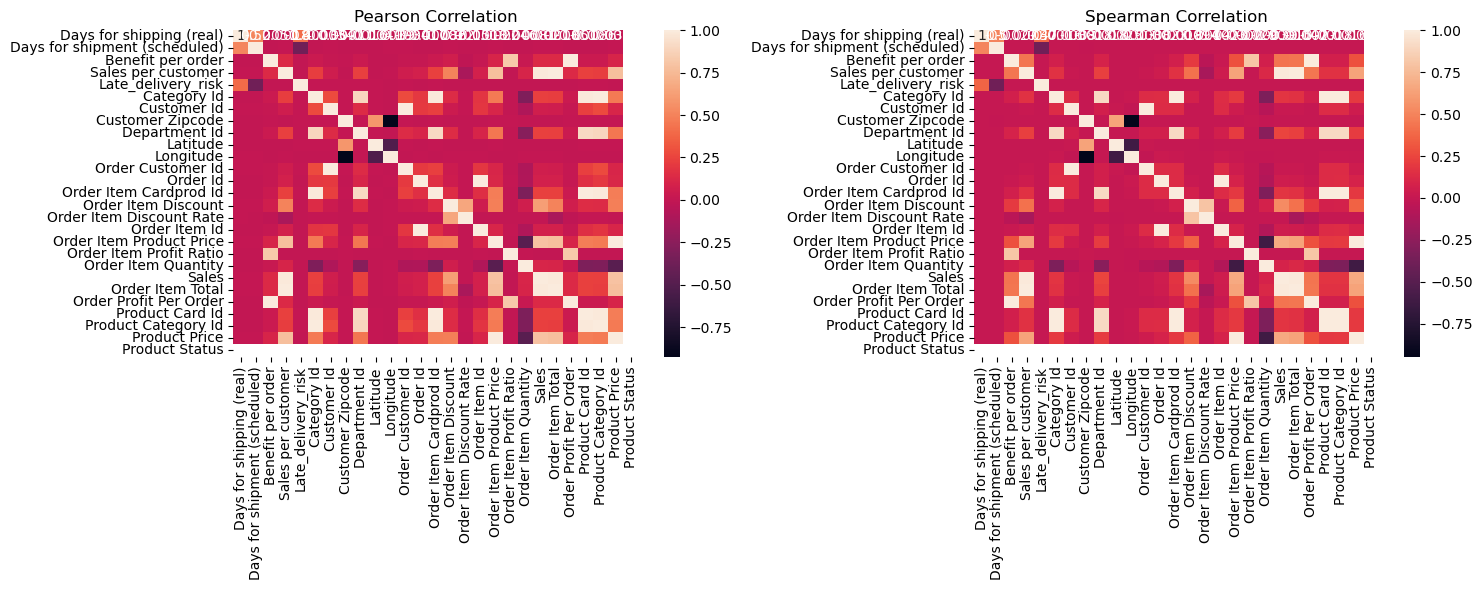

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
pearson_corr = supply_df[numerical_cols].corr()
spearman_corr = supply_df[numerical_cols].corr(method = 'spearman')
sb.heatmap(pearson_corr, annot = True, ax = axes[0])
sb.heatmap(spearman_corr, annot = True, ax = axes[1])
axes[0].set_title('Pearson Correlation')
axes[1].set_title('Spearman Correlation')
plt.tight_layout()
plt.show()

In [29]:
supply_df.drop(columns = ['Order Profit Per Order', 'Sales per customer', 'Order Item Total', 'Department Id', 'Order Item Cardprod Id', 'Product Category Id', 'Product Card Id', 'Order Customer Id', 'Order Item Product Price', 'Product Status'],  inplace = True)

In [30]:
supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,179253,-0.80,1,327.75,South Asia,Rajastán,CLOSED,Smart watch,327.75,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,179252,0.08,1,327.75,Oceania,Queensland,COMPLETE,Smart watch,327.75,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,179251,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,2018-01-15 11:24:00,Standard Class


In [31]:
numerical_cols = supply_df.select_dtypes(include = 'number').columns.tolist()
print(numerical_cols)
categorical_cols = supply_df.select_dtypes(include = 'object').columns.tolist()
print(categorical_cols)

['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Latitude', 'Longitude', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Product Price']
['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode']


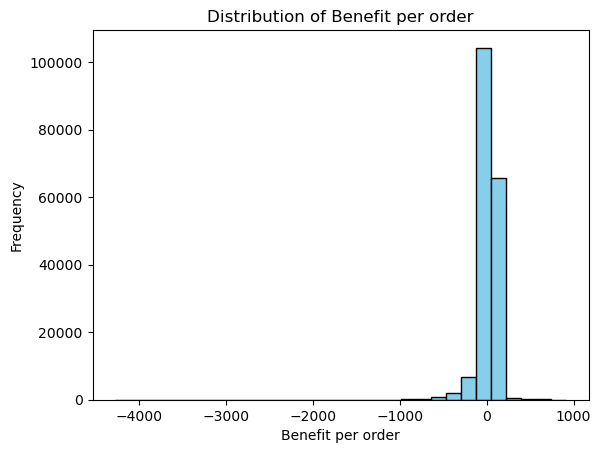

In [32]:
plt.hist(supply_df['Benefit per order'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Benefit per order')
plt.xlabel('Benefit per order')
plt.ylabel('Frequency')
plt.show()

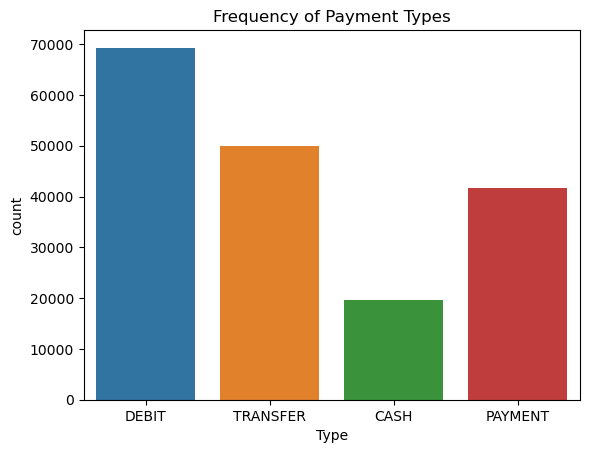

In [33]:
sb.countplot(data=supply_df, x='Type')
plt.title('Frequency of Payment Types')
plt.show()

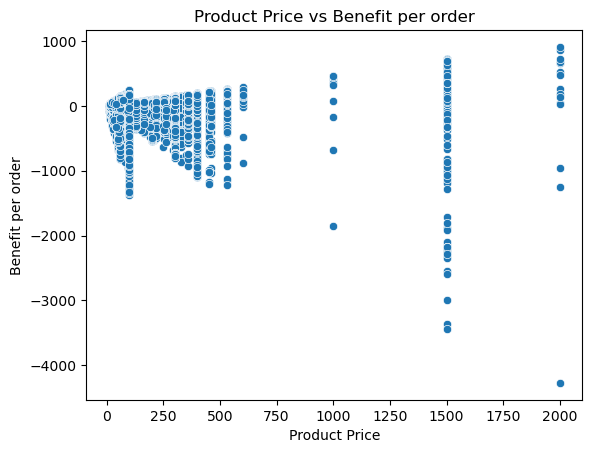

In [34]:
sb.scatterplot(data=supply_df, x='Product Price', y='Benefit per order')
plt.title('Product Price vs Benefit per order')
plt.show()

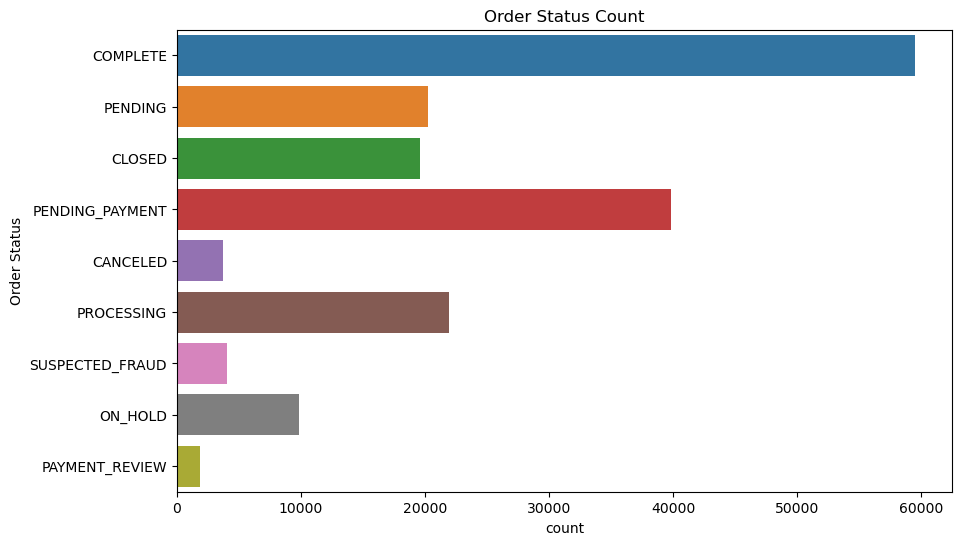

In [35]:
# Bar Plot for Order Status
plt.figure(figsize=(10, 6))
sb.countplot(data=supply_df, y='Order Status')
plt.title('Order Status Count')
plt.show()

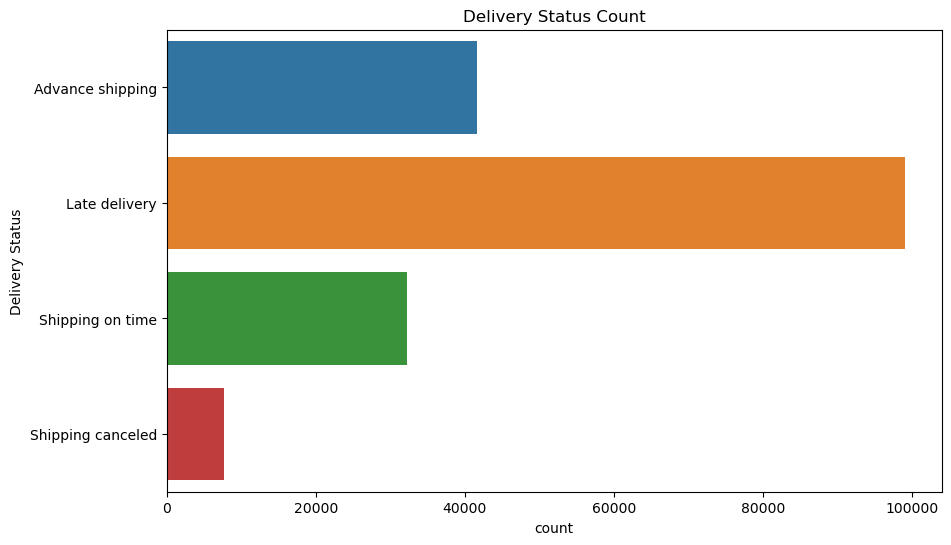

In [36]:
plt.figure(figsize=(10, 6))
sb.countplot(data=supply_df, y='Delivery Status')
plt.title('Delivery Status Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


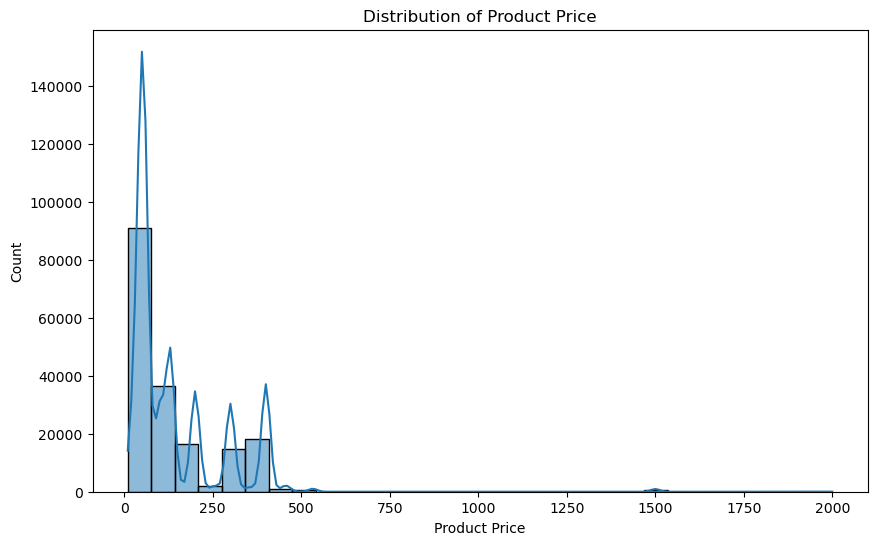

In [37]:
# Histogram for Product Price
plt.figure(figsize=(10, 6))
sb.histplot(supply_df['Product Price'], bins=30, kde=True)
plt.title('Distribution of Product Price')
plt.show()

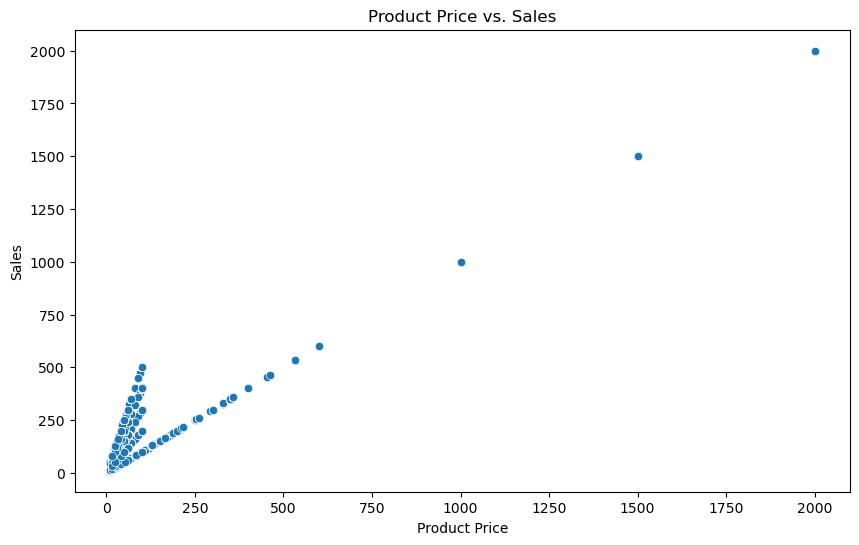

In [38]:
# Scatter Plot for Product Price vs. Sales
plt.figure(figsize=(10, 6))
sb.scatterplot(data=supply_df, x='Product Price', y='Sales')
plt.title('Product Price vs. Sales')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


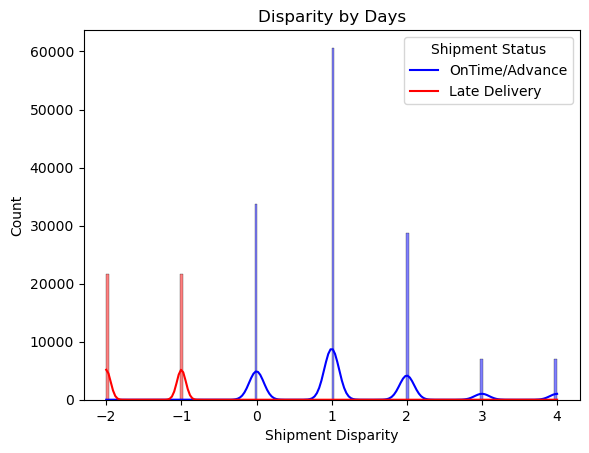

In [39]:
df = pd.DataFrame()
df['Shipment Disparity'] = supply_df['Days for shipping (real)'] - supply_df['Days for shipment (scheduled)']
sb.histplot(data = df, x = 'Shipment Disparity', kde = True, hue = df['Shipment Disparity'] >= 0, palette = {True: 'blue', False: 'red'})
plt.title('Disparity by Days')
plt.legend(title='Shipment Status', labels=['OnTime/Advance', 'Late Delivery'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


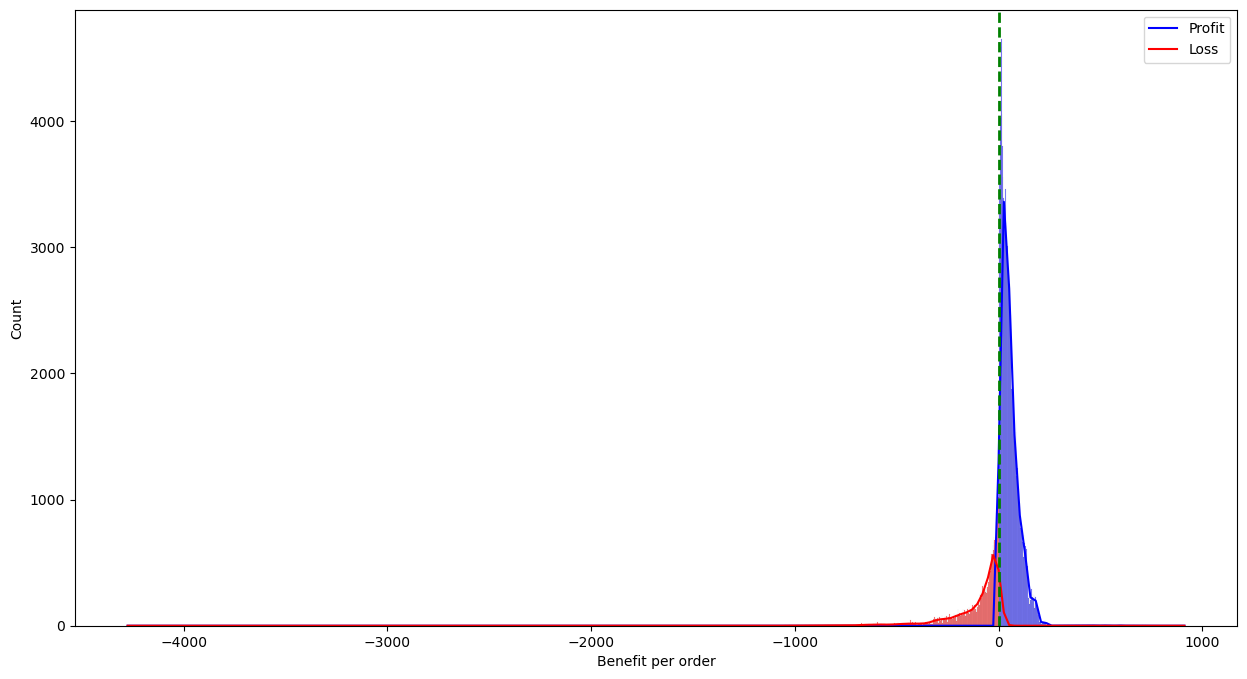

In [41]:
plt.figure(figsize = (15, 8))
sb.histplot(data = supply_df, x = 'Benefit per order', kde = True, hue = supply_df['Benefit per order'] > 0, palette = {True: 'blue', False: 'red'})
plt.axvline(0, color='green', linestyle='--', linewidth=2)
plt.legend(['Profit', 'Loss'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


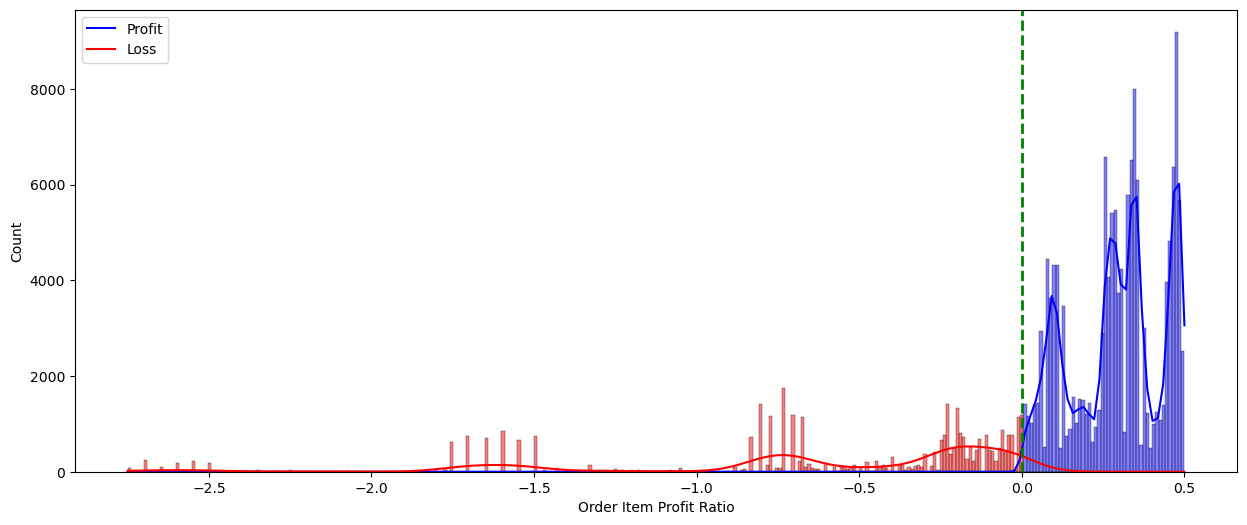

In [43]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Order Item Profit Ratio', kde = True, hue = supply_df['Order Item Profit Ratio'] > 0, palette = {True: 'blue', False: 'red'})
plt.axvline(0, color='green', linestyle='--', linewidth=2)
plt.legend(['Profit', 'Loss'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


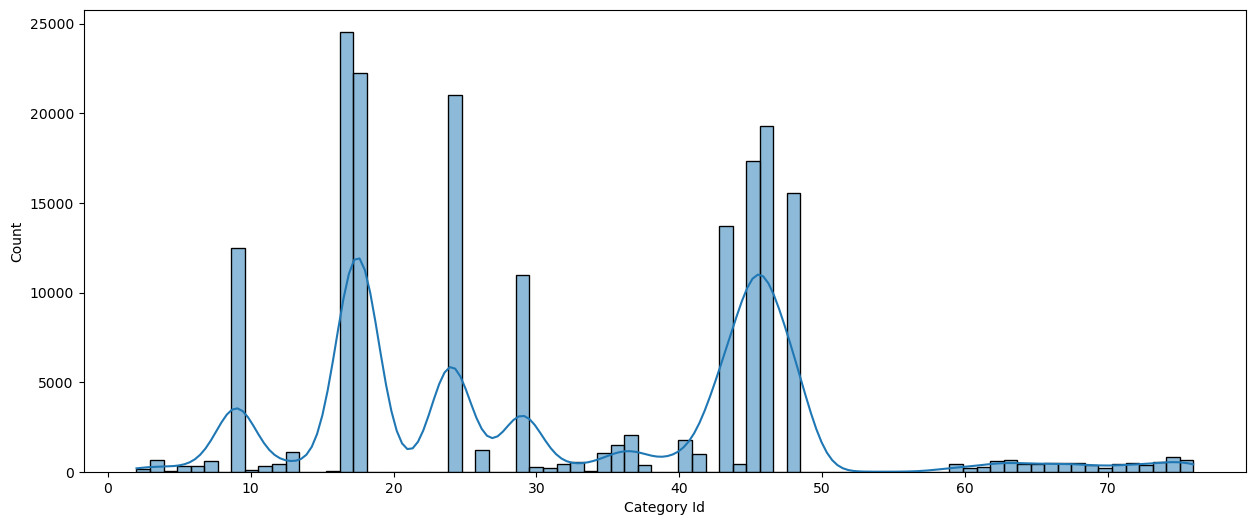

In [44]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Category Id', kde = True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


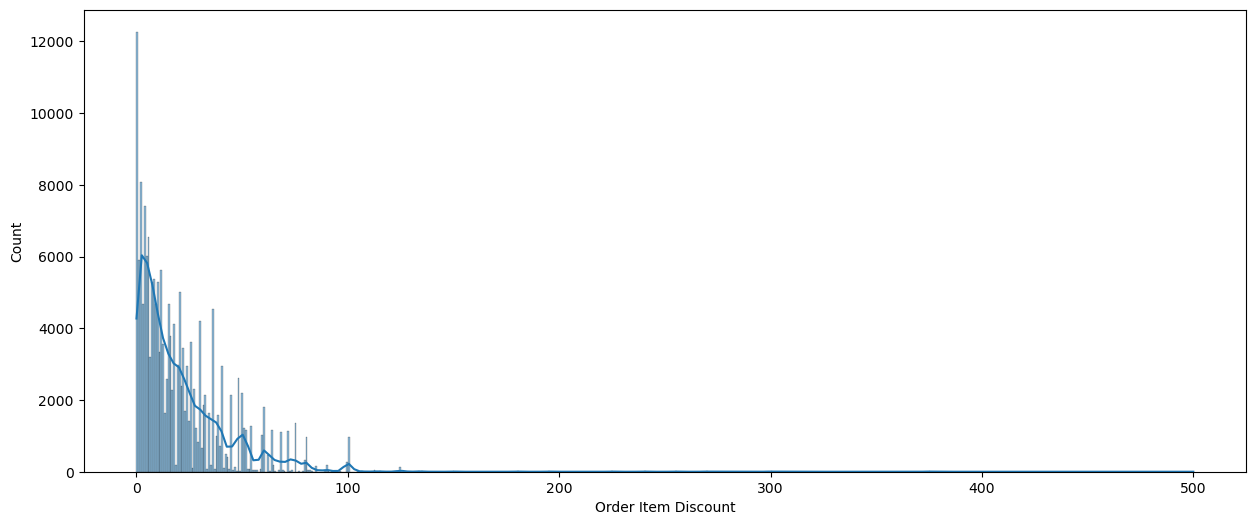

In [45]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Order Item Discount', kde = True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


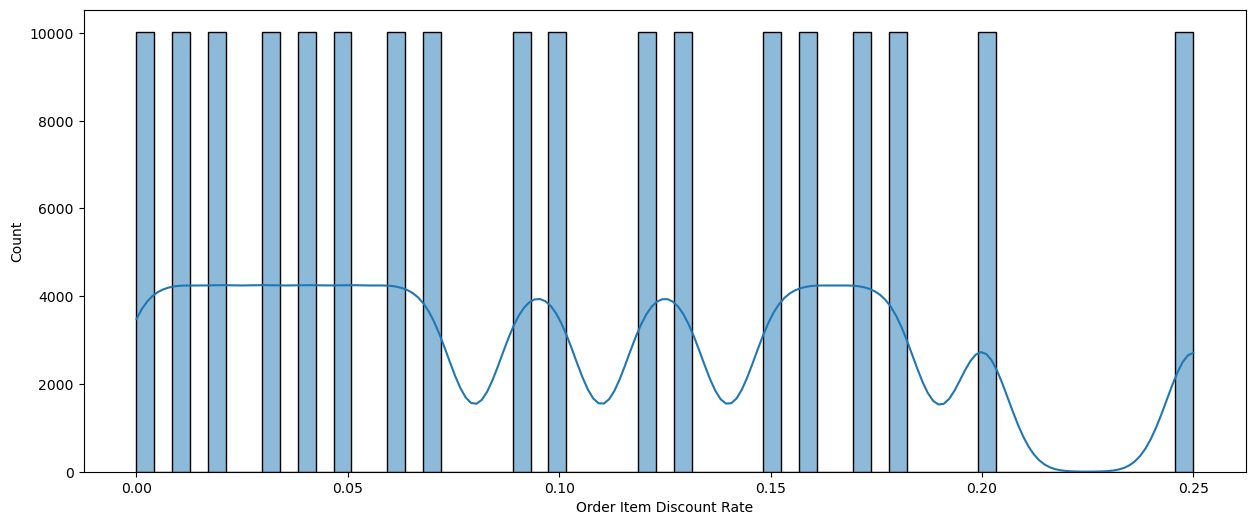

In [46]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Order Item Discount Rate', kde = True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


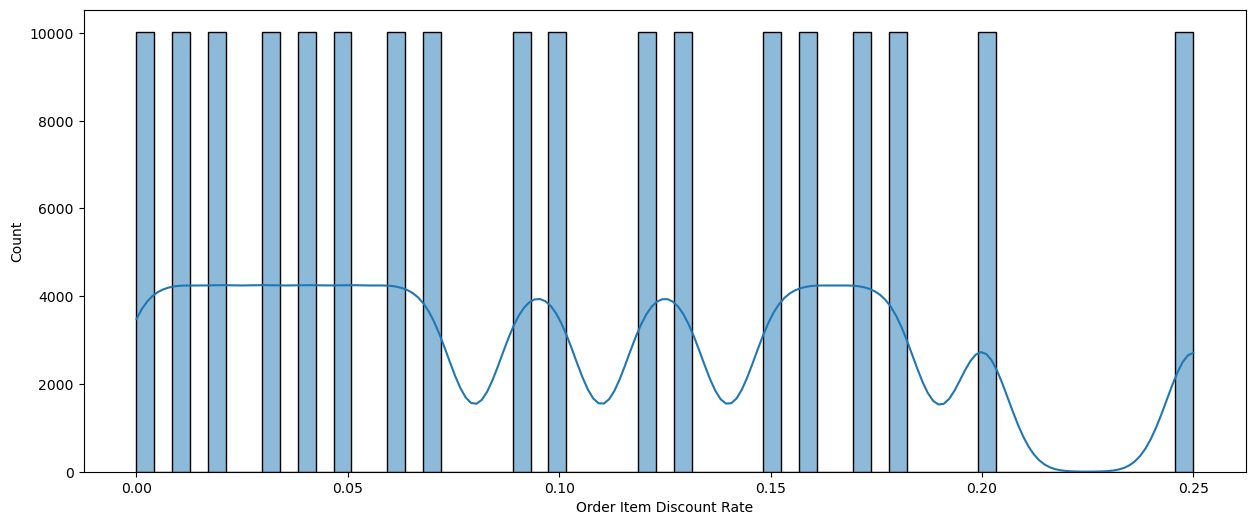

In [47]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Order Item Discount Rate', kde = True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


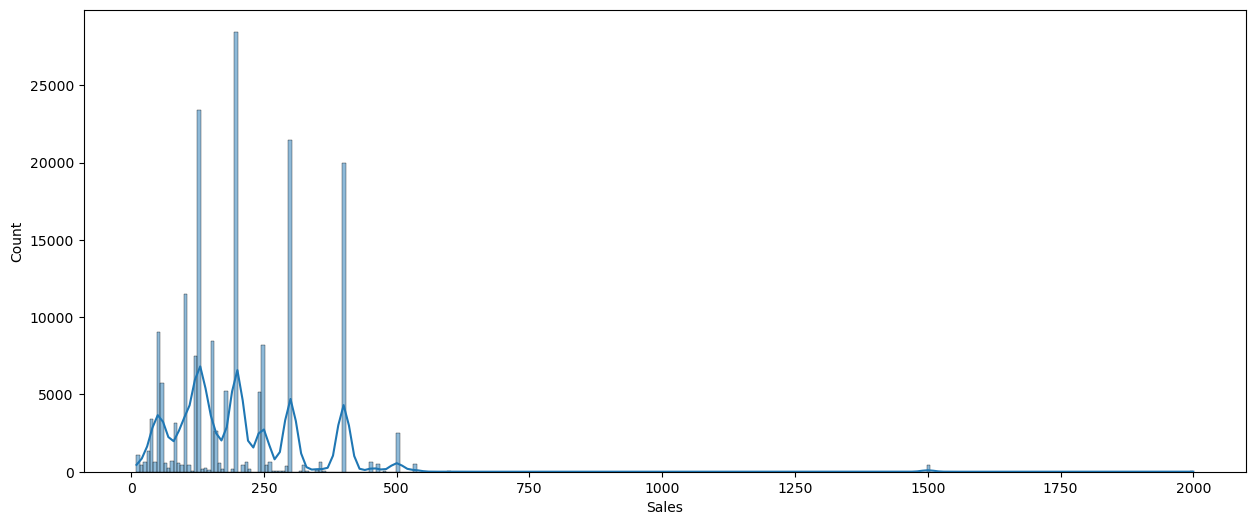

In [48]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Sales', kde = True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


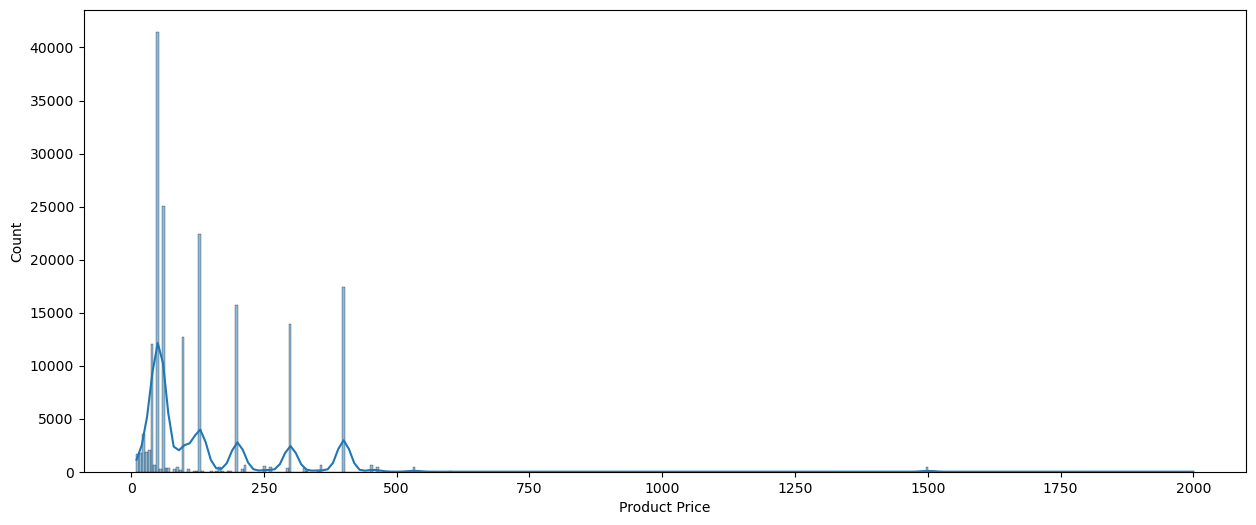

In [49]:
plt.figure(figsize = (15, 6))
sb.histplot(data = supply_df, x = 'Product Price', kde = True)
plt.show()

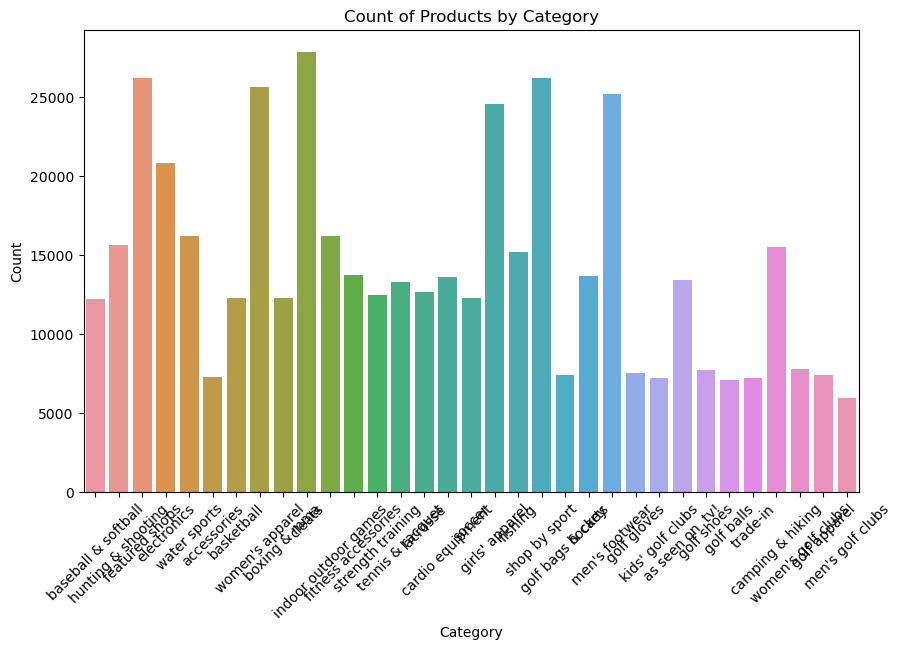

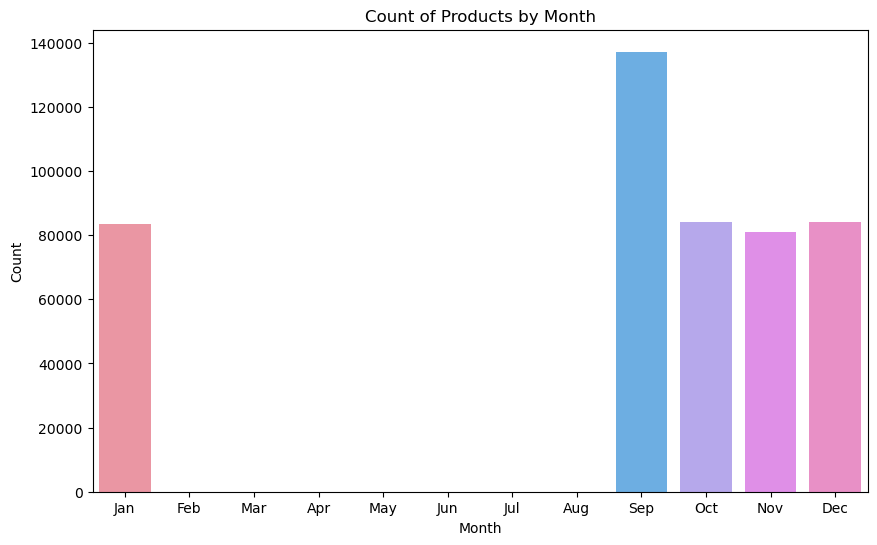

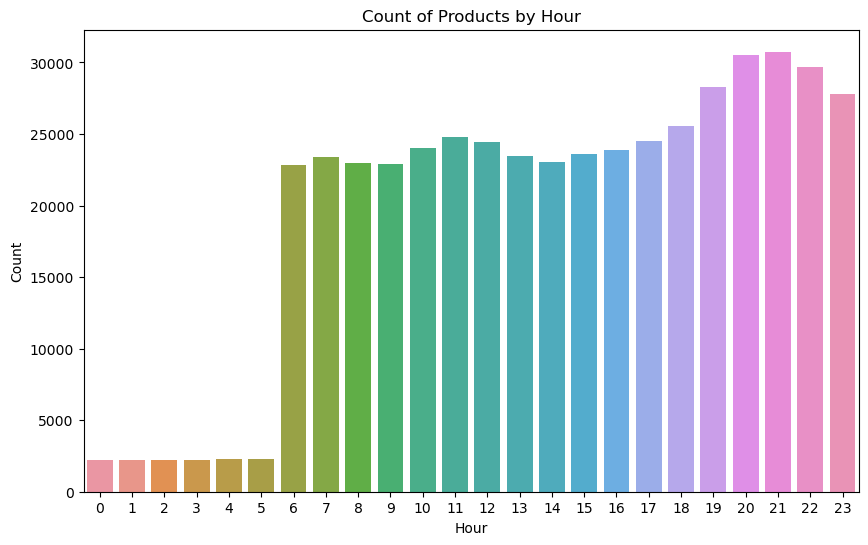

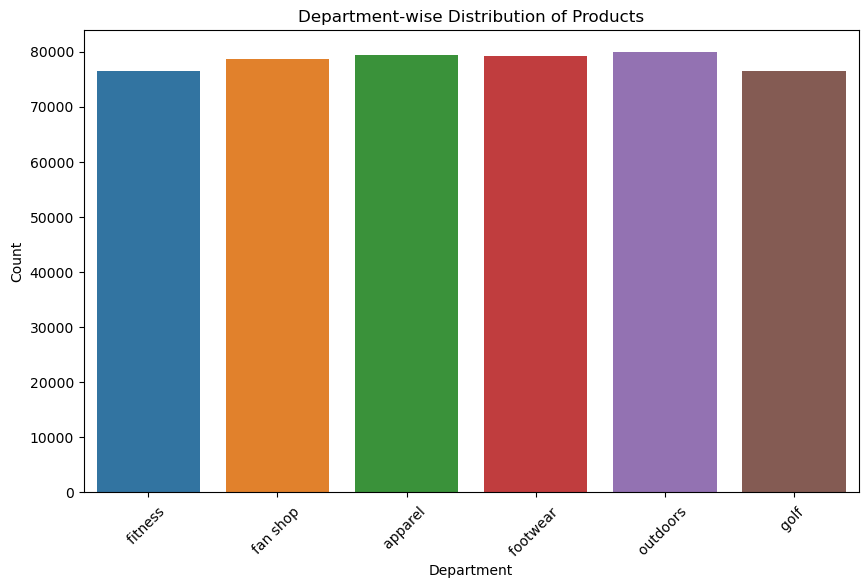

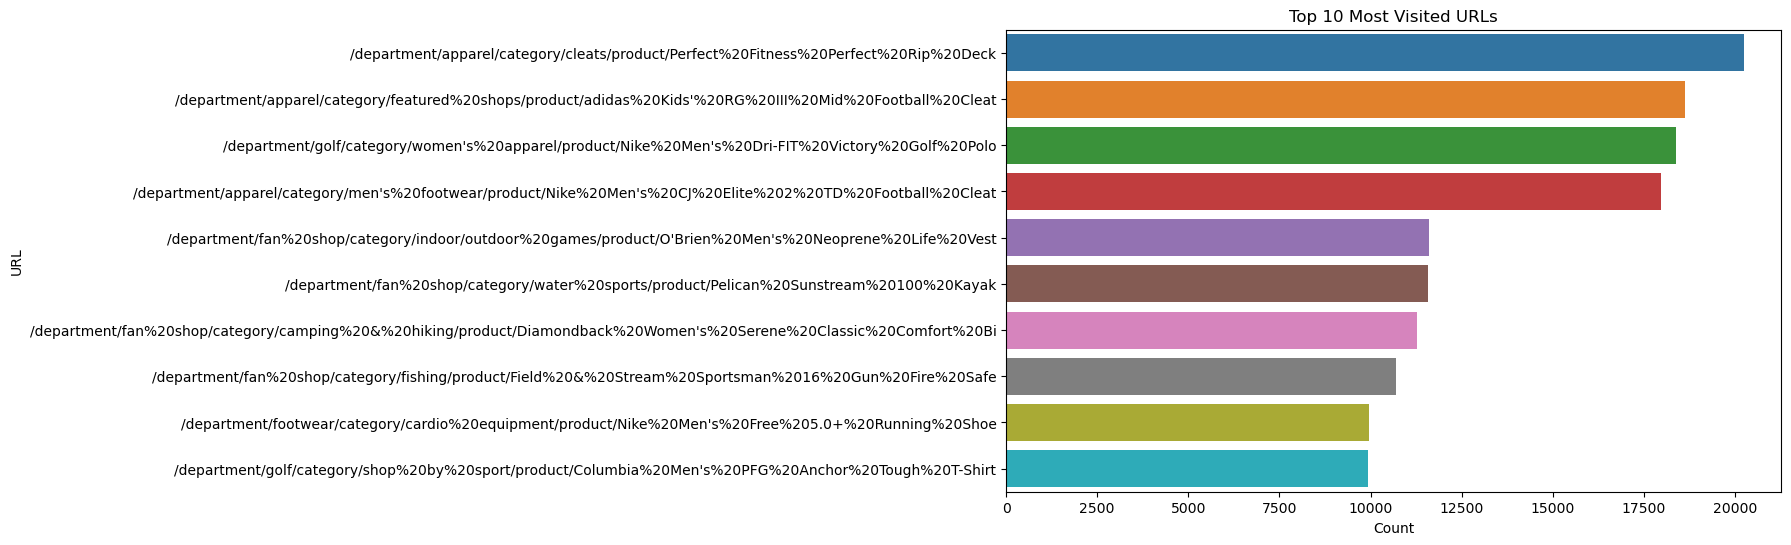

In [50]:
#tokenized _df visuals 
# Visualization 1: Count of Products by Category
plt.figure(figsize=(10, 6))
sb.countplot(data=tokenized_df, x='Category')
plt.title('Count of Products by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Visualization 2: Count of Products by Month
plt.figure(figsize=(10, 6))
sb.countplot(data=tokenized_df, x='Month', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Count of Products by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Visualization 3: Count of Products by Hour
plt.figure(figsize=(10, 6))
sb.countplot(data=tokenized_df, x='Hour')
plt.title('Count of Products by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Visualization 4: Department-wise Distribution of Products
plt.figure(figsize=(10, 6))
sb.countplot(data=tokenized_df, x='Department')
plt.title('Department-wise Distribution of Products')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Top N Most Visited URLs
top_n = 10
top_urls = tokenized_df['url'].value_counts().nlargest(top_n)
plt.figure(figsize=(10, 6))
sb.barplot(x=top_urls.values, y=top_urls.index, orient='h')
plt.title(f'Top {top_n} Most Visited URLs')
plt.xlabel('Count')
plt.ylabel('URL')
plt.show()


In [52]:
#tokenized_df analysis

# Analysis 1: Product Category Analysis
product_category_counts = tokenized_df['Category'].value_counts()
print("Product Category Counts:")
print(product_category_counts)

Product Category Counts:
Category
cleats                  27878
shop by sport           26227
featured shops          26200
women's apparel         25627
men's footwear          25241
girls' apparel          24581
electronics             20845
indoor outdoor games    16194
water sports            16186
hunting & shooting      15645
camping & hiking        15521
fishing                 15178
fitness accessories     13752
hockey                  13657
cardio equipment        13641
as seen on  tv!         13448
tennis & racquet        13275
lacrosse                12676
strength training       12479
basketball              12313
soccer                  12271
boxing & mma            12260
baseball & softball     12245
women's golf clubs       7782
golf shoes               7732
golf gloves              7510
golf bags & carts        7438
golf apparel             7427
accessories              7279
kids' golf clubs         7234
trade-in                 7208
golf balls               7063
men's 

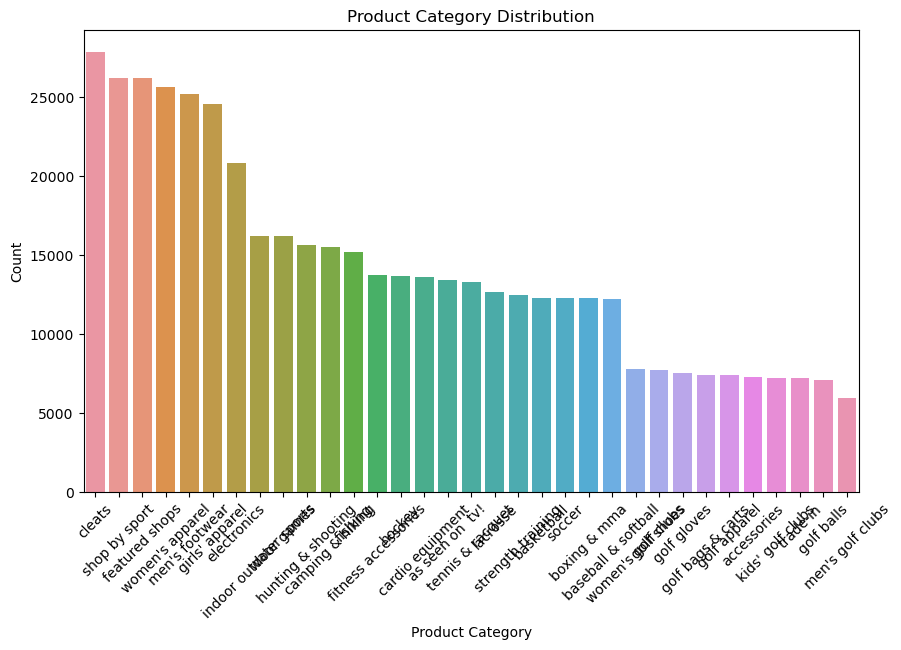

In [53]:
plt.figure(figsize=(10, 6))
sb.barplot(x=product_category_counts.index, y=product_category_counts.values)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Analysis 2: Department Analysis
department_counts = tokenized_df['Department'].value_counts()
print("Department Counts:")
print(department_counts)

Department Counts:
Department
outdoors     79926
apparel      79319
footwear     79136
fan shop     78724
fitness      76437
golf         76435
Name: count, dtype: int64


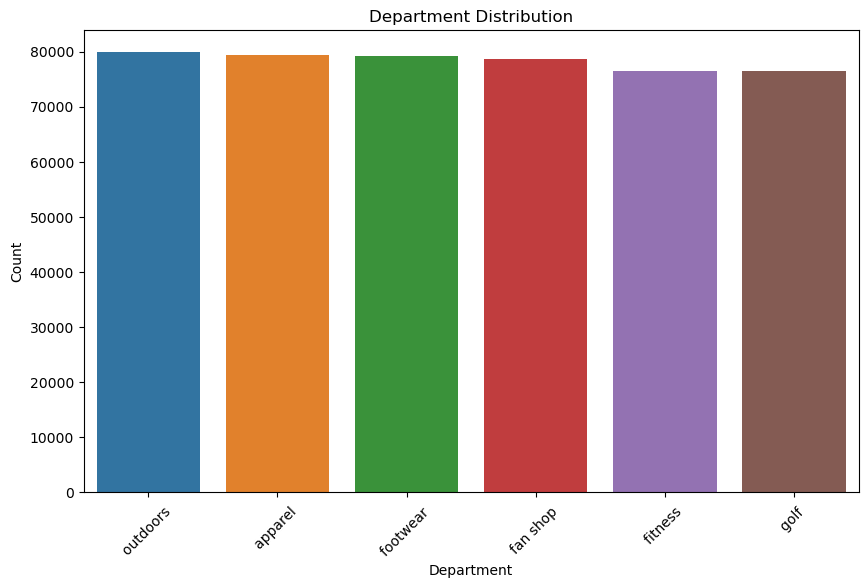

In [55]:
plt.figure(figsize=(10, 6))
sb.barplot(x=department_counts.index, y=department_counts.values)
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


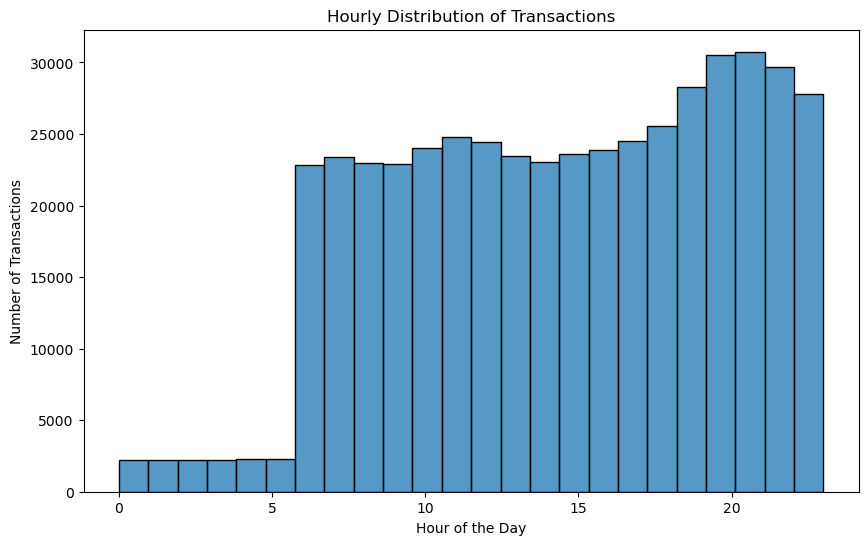

In [56]:
# Analysis 3: Hourly Distribution of Transactions
plt.figure(figsize=(10, 6))
sb.histplot(data=tokenized_df, x='Hour', bins=24, kde=False)
plt.title('Hourly Distribution of Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

In [57]:
# Analysis 4: Monthly Transaction Trend
monthly_transaction_counts = tokenized_df['Month'].value_counts().sort_index()
print("Monthly Transaction Counts:")
print(monthly_transaction_counts)

Monthly Transaction Counts:
Month
Dec     84093
Jan     83581
Nov     80860
Oct     84205
Sep    137238
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


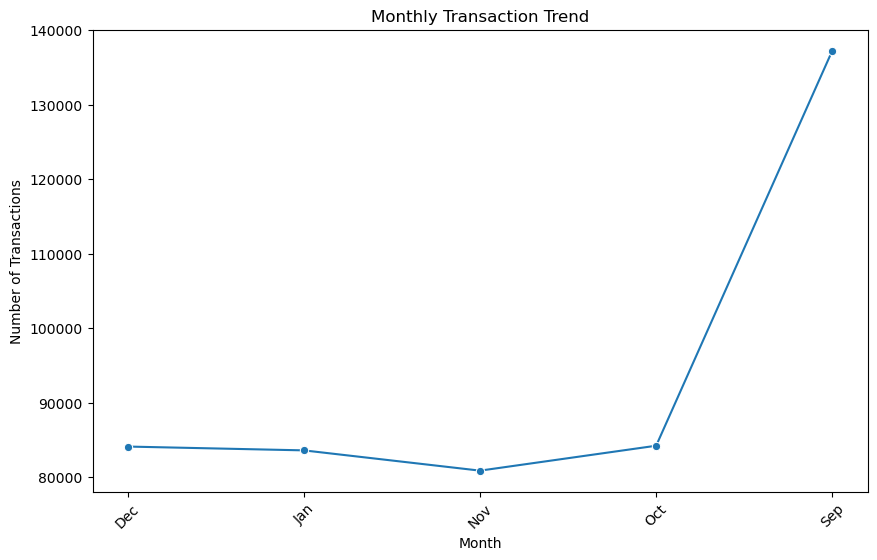

In [58]:
plt.figure(figsize=(10, 6))
sb.lineplot(x=monthly_transaction_counts.index, y=monthly_transaction_counts.values, marker='o')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [59]:
# Analysis 5: IP Address Analysis
top_ip_addresses = tokenized_df['ip'].value_counts().head(10)
print("Top 10 IP Addresses:")
print(top_ip_addresses)

Top 10 IP Addresses:
ip
157.21.93.193      566
138.21.216.113     557
77.137.114.147     516
83.234.215.133     514
47.102.94.70       514
150.89.112.119     508
211.122.14.29      505
99.237.181.177     502
102.172.170.187    495
69.214.176.127     493
Name: count, dtype: int64


In [60]:
# Analysis 6: URL Analysis
top_urls = tokenized_df['url'].value_counts().head(10)
print("Top 10 URLs:")
print(top_urls)

Top 10 URLs:
url
/department/apparel/category/cleats/product/Perfect%20Fitness%20Perfect%20Rip%20Deck                                    20258
/department/apparel/category/featured%20shops/product/adidas%20Kids'%20RG%20III%20Mid%20Football%20Cleat                18643
/department/golf/category/women's%20apparel/product/Nike%20Men's%20Dri-FIT%20Victory%20Golf%20Polo                      18372
/department/apparel/category/men's%20footwear/product/Nike%20Men's%20CJ%20Elite%202%20TD%20Football%20Cleat             17963
/department/fan%20shop/category/indoor/outdoor%20games/product/O'Brien%20Men's%20Neoprene%20Life%20Vest                 11602
/department/fan%20shop/category/water%20sports/product/Pelican%20Sunstream%20100%20Kayak                                11577
/department/fan%20shop/category/camping%20&%20hiking/product/Diamondback%20Women's%20Serene%20Classic%20Comfort%20Bi    11272
/department/fan%20shop/category/fishing/product/Field%20&%20Stream%20Sportsman%2016%20Gun%20Fire%20Sa

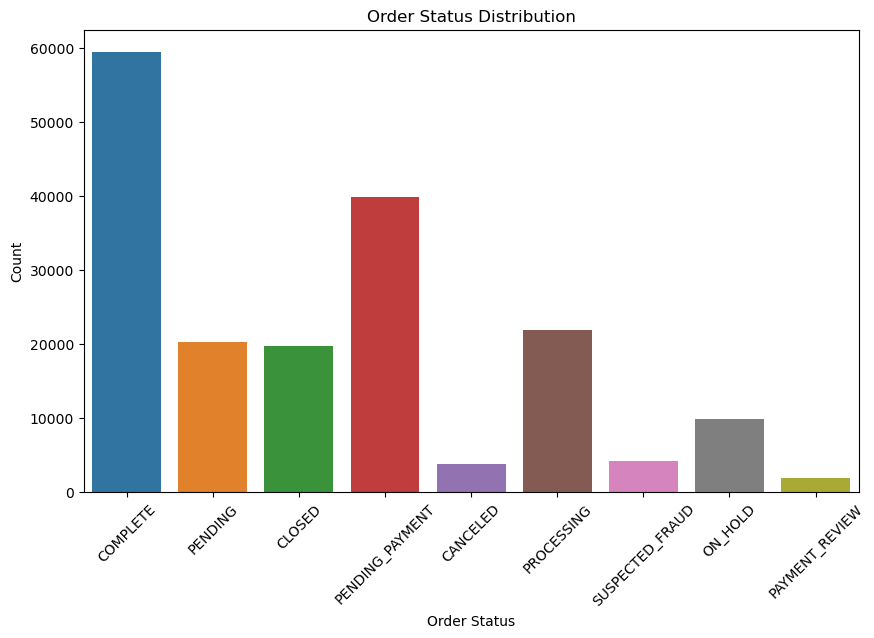

In [61]:
#supply df visuals and analysis

# Visualization 1: Order Status Distribution
plt.figure(figsize=(10, 6))
sb.countplot(data=supply_df, x='Order Status')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

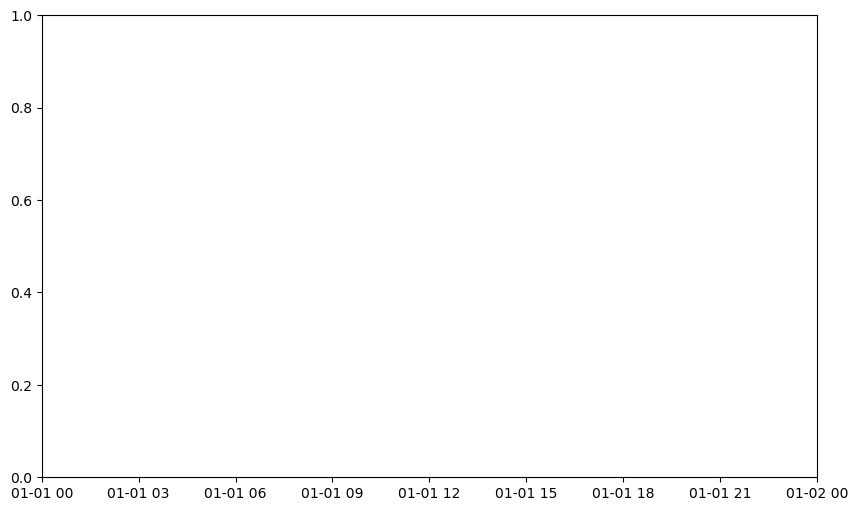

In [69]:
# Visualization 2: Sales Trend Over Time
plt.figure(figsize=(10, 6))
sb.lineplot(data=supply_df, x='order date (DateOrders)', y='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


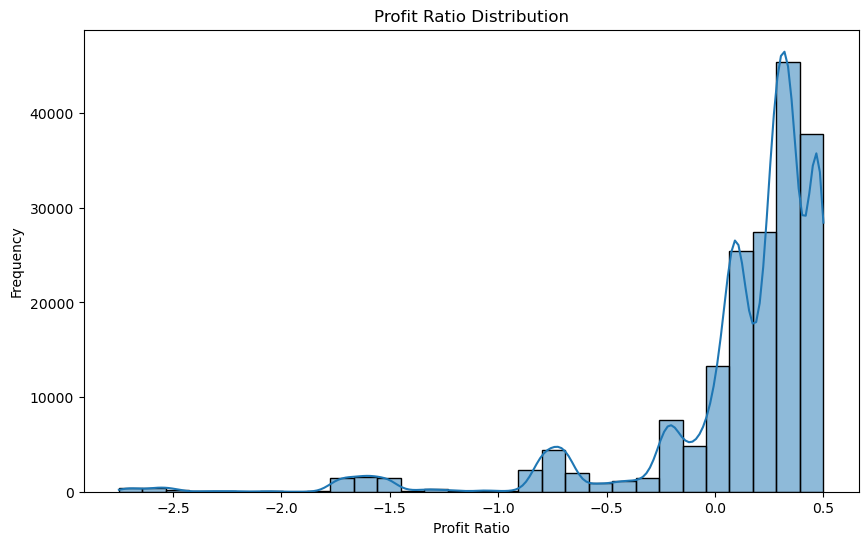

In [63]:
# Visualization 3: Profit Ratio Distribution
plt.figure(figsize=(10, 6))
sb.histplot(data=supply_df, x='Order Item Profit Ratio', bins=30, kde=True)
plt.title('Profit Ratio Distribution')
plt.xlabel('Profit Ratio')
plt.ylabel('Frequency')
plt.show()

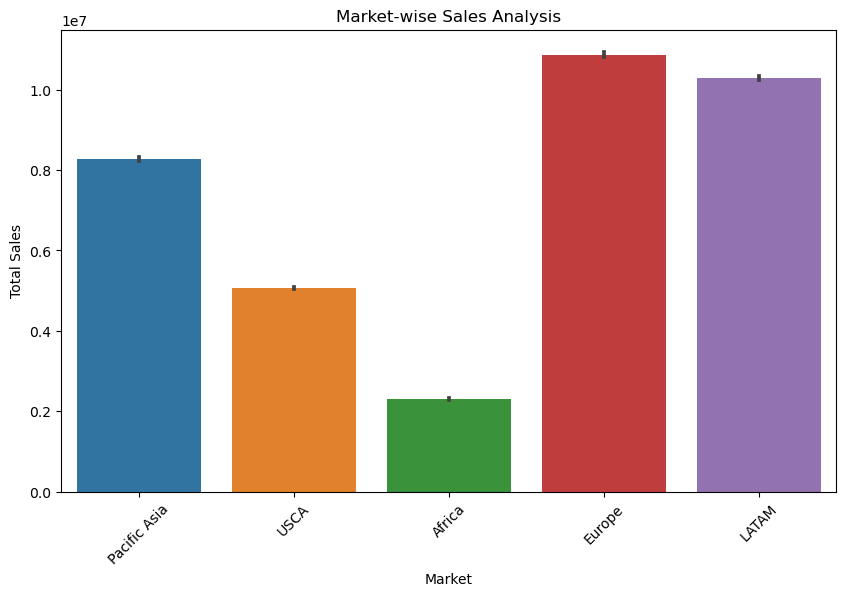

In [64]:
# Visualization 4: Market-wise Sales Analysis
plt.figure(figsize=(10, 6))
sb.barplot(data=supply_df, x='Market', y='Sales', estimator=sum)
plt.title('Market-wise Sales Analysis')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

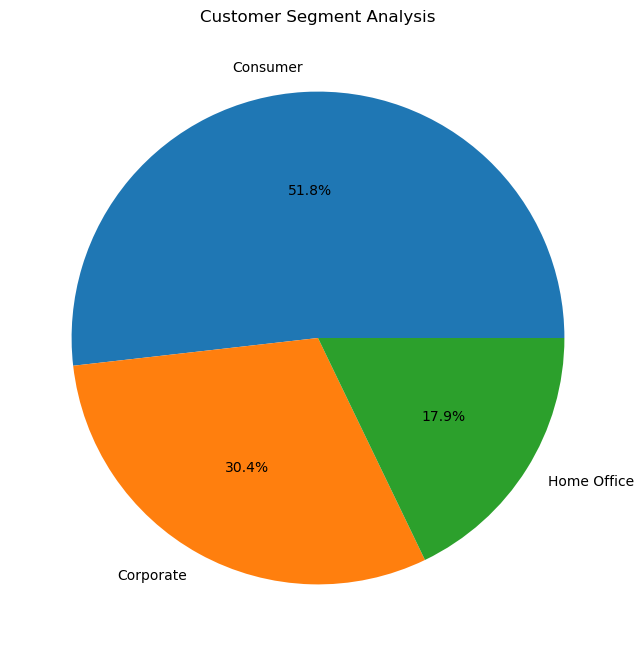

In [65]:
# Visualization 5: Customer Segment Analysis
plt.figure(figsize=(8, 8))
supply_df['Customer Segment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Customer Segment Analysis')
plt.ylabel('')
plt.show()

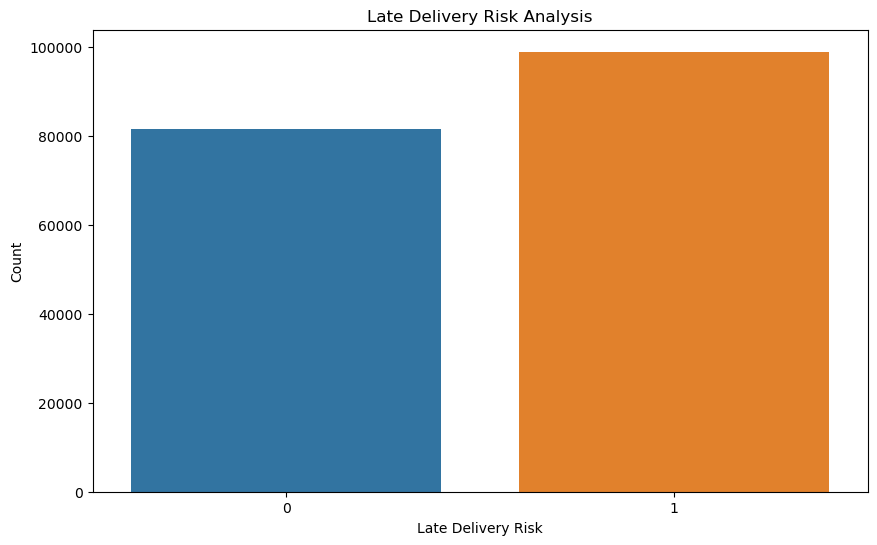

In [66]:
# Visualization 6: Late Delivery Risk Analysis
plt.figure(figsize=(10, 6))
sb.countplot(data=supply_df, x='Late_delivery_risk')
plt.title('Late Delivery Risk Analysis')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


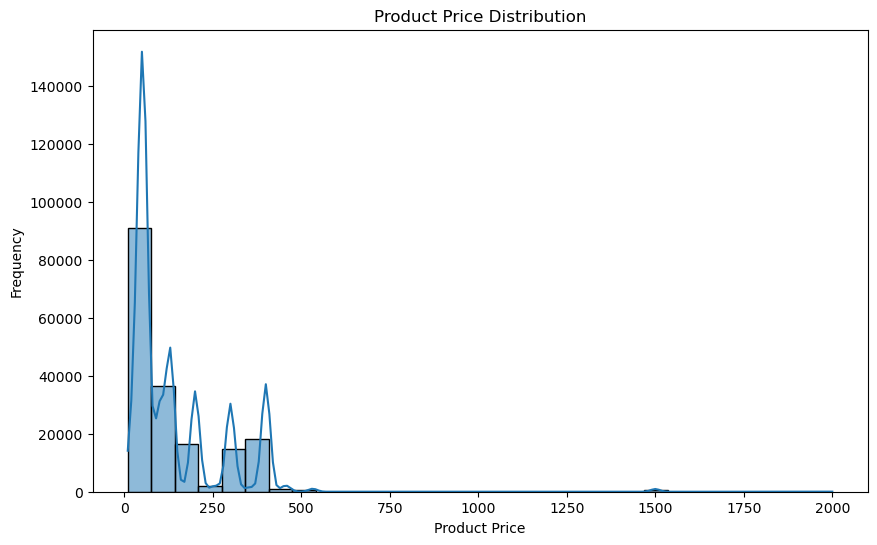

In [67]:
# Visualization 7: Product Price Distribution
plt.figure(figsize=(10, 6))
sb.histplot(data=supply_df, x='Product Price', bins=30, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

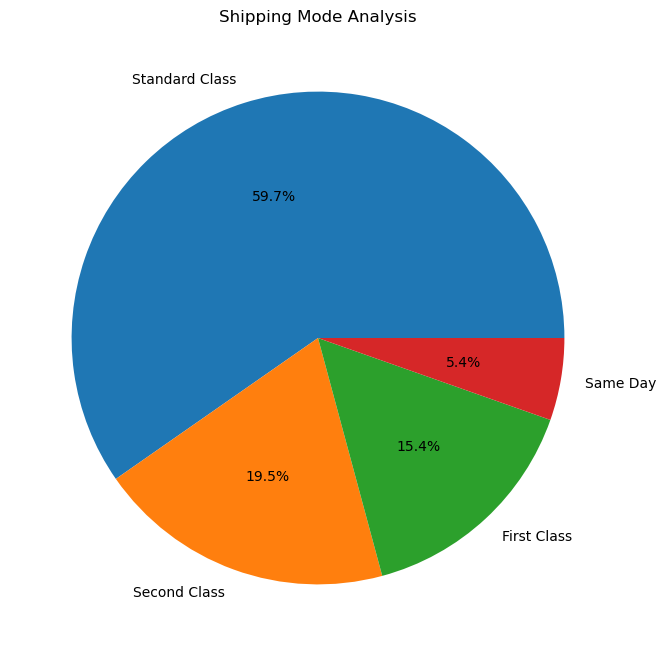

In [68]:
# Visualization 8: Shipping Mode Analysis
plt.figure(figsize=(8, 8))
supply_df['Shipping Mode'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Shipping Mode Analysis')
plt.ylabel('')
plt.show()